# EQUITY VANILLA EUROPEAN-STYLE OPTIONS

Valuation and Risk of a simple Vanilla Equity Option

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from financepy.utils import *
from financepy.products.equity import *

# Define the Call and Put Options

In [28]:
value_dt = Date(1, 1, 2026)

In [29]:
expiry_dt = Date(1, 6, 2026)

In [30]:
strike_price = 50.0

In [31]:
call_option = EquityVanillaOption(expiry_dt, strike_price, OptionTypes.EUROPEAN_CALL)

In [32]:
print(call_option)

OBJECT TYPE: EquityVanillaOption
EXPIRY DATE: 01-JUN-2026
STRIKE PRICE: 50.0
OPTION TYPE VALUE: OptionTypes.EUROPEAN_CALL
NUMBER: 1.0


In [33]:
put_option = EquityVanillaOption(expiry_dt, strike_price, OptionTypes.EUROPEAN_PUT)

In [58]:
stock_price = 50.0
volatility = 0.20
interest_rate = 0.05
dividend_yield = 0.02

In [59]:
discount_curve = DiscountCurveFlat(value_dt, interest_rate, FrequencyTypes.CONTINUOUS)

In [60]:
dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)

In [61]:
model = BlackScholes(volatility)

In [62]:
call_option.value(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(2.8449436313648704)

In [63]:
put_option.value(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(2.2333122174362074)

In [64]:
print(call_option)

OBJECT TYPE: EquityVanillaOption
EXPIRY DATE: 01-JUN-2026
STRIKE PRICE: 50.0
OPTION TYPE VALUE: OptionTypes.EUROPEAN_CALL
NUMBER: 1.0


In [65]:
print(put_option)

OBJECT TYPE: EquityVanillaOption
EXPIRY DATE: 01-JUN-2026
STRIKE PRICE: 50.0
OPTION TYPE VALUE: OptionTypes.EUROPEAN_PUT
NUMBER: 1.0


## Risk Measures

You can calculate the risk measures using the exact formulae (x risks) or using perturbatory analysis

In [66]:
call_option.delta(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(0.559227735475412)

In [67]:
call_option.gamma(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(0.06072396048704044)

In [44]:
call_option.theta(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(-4.3421808594571125)

In [45]:
call_option.rho(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(10.909378488617923)

In [46]:
call_option.vega(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(12.508853489335543)

## Vectorisation

In [47]:
stock_prices = np.linspace(20,80,100)

In [48]:
value = call_option.value(value_dt, stock_prices, discount_curve, dividend_curve, model)

Text(0, 0.5, 'Option Premium')

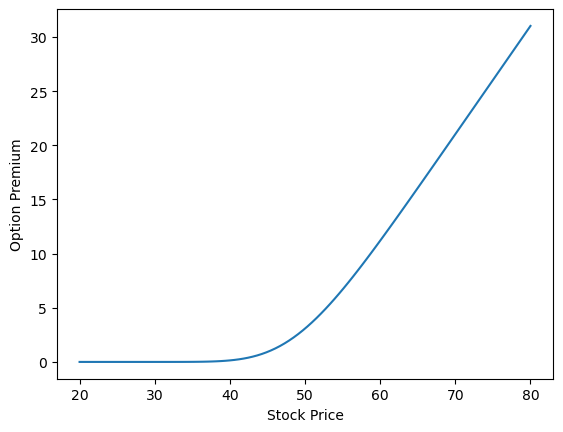

In [49]:
plt.plot(stock_prices, value)
plt.xlabel("Stock Price")
plt.ylabel("Option Premium")

## Risk Measures using Vectorisations

In [50]:
deltas = call_option.delta(value_dt, stock_prices, discount_curve, dividend_curve, model)

Text(0, 0.5, 'Option Deltas')

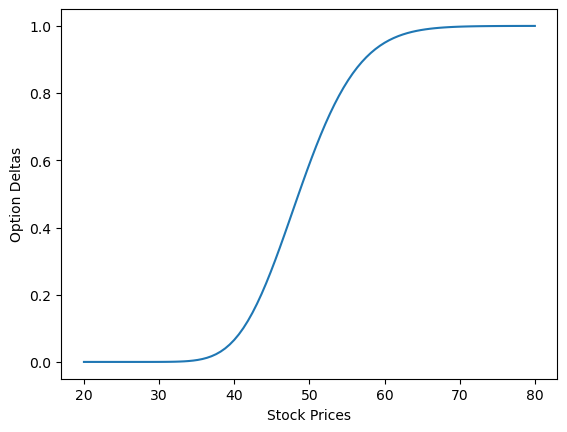

In [51]:
plt.plot(stock_prices, deltas)
plt.xlabel("Stock Prices")
plt.ylabel("Option Deltas")

In [52]:
gammas = call_option.gamma(value_dt, stock_prices, discount_curve, dividend_curve, model)

Text(0, 0.5, 'Option Gamma')

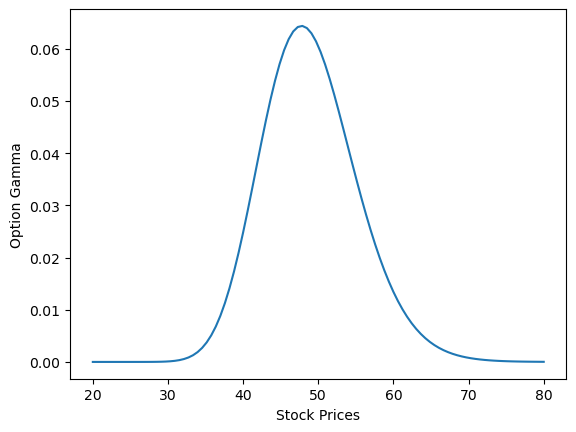

In [53]:
plt.plot(stock_prices, gammas)
plt.xlabel("Stock Prices")
plt.ylabel("Option Gamma")

In [54]:
thetas = call_option.theta(value_dt, stock_prices, discount_curve, dividend_curve, model)

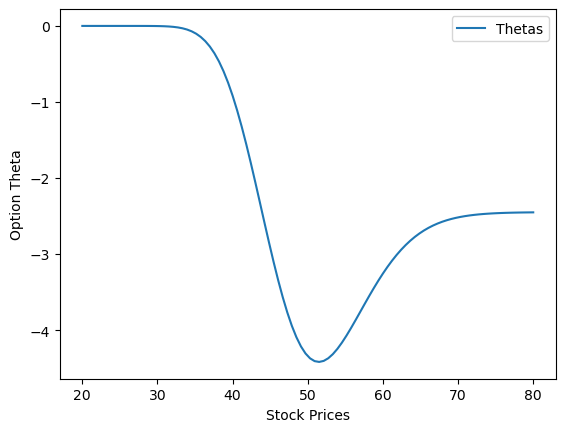

In [55]:
plt.plot(stock_prices, thetas, label="Thetas")
plt.xlabel("Stock Prices")
plt.ylabel("Option Theta")
plt.legend()

In [56]:
rhos = call_option.rho(value_dt, stock_prices, discount_curve, dividend_curve, model)

Text(0, 0.5, 'Option Rho')

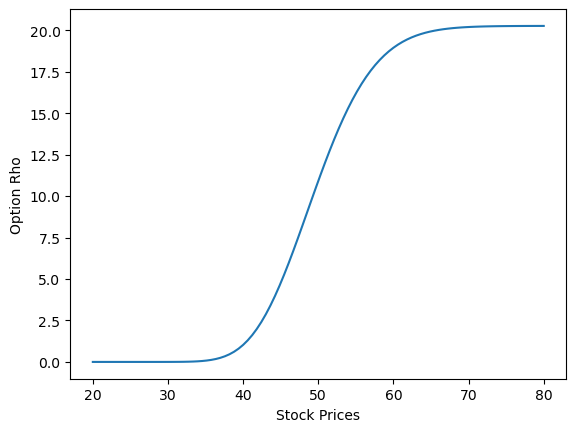

In [57]:
plt.plot(stock_prices, rhos)
plt.xlabel("Stock Prices")
plt.ylabel("Option Rho")

Copyright (c) 2020 Dominic O'Kane